# "Medical Imaging Part2"
> "Reviewing fastai notebook 60_medical.imaging.ipynb"
- toc: true
- branch: master
- badges: true
- comments: true
- categories: [medical_imaging, dicom, fastai]

**Continuing from Part1 >>>>**

In [3]:
from fastai2.basics import *
from fastai2.callback.all import *
from fastai2.vision.all import *
from fastai2.medical.imaging import *

import pydicom
matplotlib.rcParams['image.cmap'] = 'bone'

pneumothorax_source = untar_data(URLs.SIIM_SMALL)
items = get_dicom_files(pneumothorax_source, recurse=True, folders='train')
img = items[10]
dimg = dcmread(img)

### Class TensorCTScan

Inherits from `PILBase`

### Class PILCTScan

Inherits from `PILBase`

#### Dataset.pct_in_window

Gets the % of pixels within a window `w`, `l`

For example using lungs as the `dicom_window` (1500,-600) we see that 80% of the pixels are within the window

In [5]:
dimg.pct_in_window(*dicom_windows.lungs)

0.7996940612792969

#### uniform_blur2d

In [37]:
#Todo

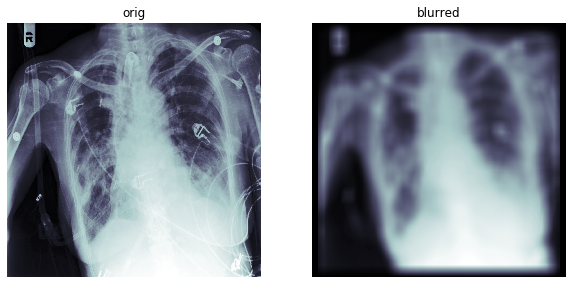

In [8]:
ims = dimg.hist_scaled(), uniform_blur2d(dimg.hist_scaled(),50)
show_images(ims, titles=('orig', 'blurred'), figsize=(10,10))

#### gauss_blur2d

In [1]:
#Todo

Uses `gaussian_blur2d` kornia filter

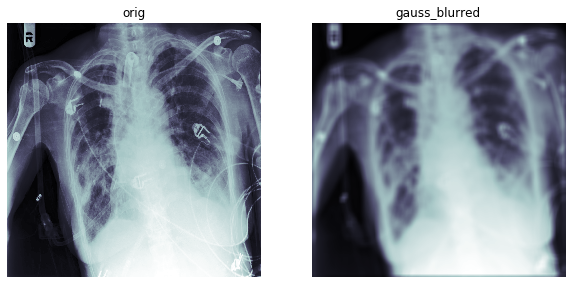

In [4]:
gims = dimg.hist_scaled(), gauss_blur2d(dimg.hist_scaled(),50)
show_images(gims, titles=('orig', 'gauss_blurred'), figsize=(10,10))

As explained in this [notebook](https://www.kaggle.com/jhoward/cleaning-the-data-for-rapid-prototyping-fastai) Jeremy uses these methods in cleaning the data in order to only retain information that is relevant.  You use `gauss_blur2d` to blur the image and select the areas that are bright

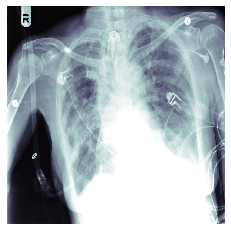

In [5]:
px = dimg.windowed(*dicom_windows.lungs)
show_image(px, figsize=(4,4));

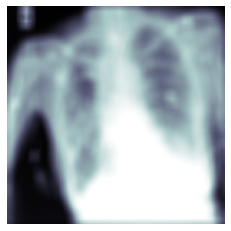

In [6]:
blurred = gauss_blur2d(px, 100)
show_image(blurred, figsize=(4,4));

In [7]:
#Todo results do not match up the chest area using the lungs dicom_window

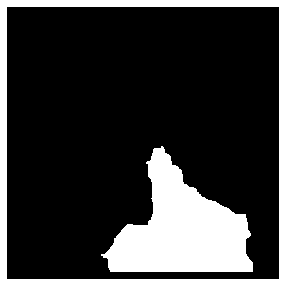

In [8]:
show_image(blurred>1);